In [2]:
import pandas as pd
import numpy as np

df = pd.read_json('/content/drive/MyDrive/VADER_normalized.json')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5733 - loss: 0.6776 - val_accuracy: 0.6105 - val_loss: 0.6578
Epoch 2/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6165 - loss: 0.6530 - val_accuracy: 0.6031 - val_loss: 0.6620
Epoch 3/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6256 - loss: 0.6452 - val_accuracy: 0.6252 - val_loss: 0.6494
Epoch 4/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6238 - loss: 0.6410 - val_accuracy: 0.6264 - val_loss: 0.6469
Epoch 5/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6300 - loss: 0.6413 - val_accuracy: 0.6248 - val_loss: 0.6483
Epoch 6/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6461 - loss: 0.6290 - val_accuracy: 0.6260 - val_loss: 0.6469
Epoch 7/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6436 - loss: 0.6299 - val_accuracy: 0.6283 - val_loss: 0.6497
Epoch 8/50
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6387 - loss: 0.6302 - val_accuracy: 0.6231 - val_

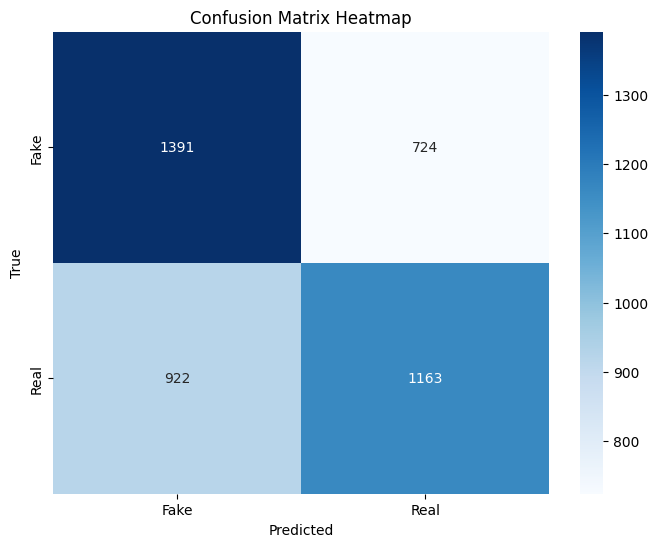


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.66      0.63      2115
           1       0.62      0.56      0.59      2085

    accuracy                           0.61      4200
   macro avg       0.61      0.61      0.61      4200
weighted avg       0.61      0.61      0.61      4200



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Assuming df is your dataframe and it already contains the features and label
X = df.drop(columns=['Label'])  # Features (all columns except 'Label')
y = df['Label']  # Target variable (Label)

# Fill missing values with the mean of each column
X = X.fillna(X.mean())

# Standardize the data (ANNs generally perform better with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target labels if it's a classification problem
y_encoded = to_categorical(y)  # If the labels are 0 or 1, this will create two columns

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()

# Input layer (equal to the number of features)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (for binary classification, 1 neuron with sigmoid activation)
model.add(Dense(y_train.shape[1], activation='softmax'))  # softmax for multi-class or sigmoid for binary

# Compile the model
model.compile(loss='categorical_crossentropy',  # categorical_crossentropy for multi-class classification
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))
